<!-- # ![H1NI VACCINE UPTAKE ANALYSIS AND PREDICTION](apple-hardware-vs-google-hardware.webp) -->

## APPLE AND GOOGLE PRODUCTS TWITTER SENTIMENT ANALYSIS

# ![H1NI VACCINE UPTAKE ANALYSIS AND PREDICTION](GvsA.jpg)

Final Project Submission Please fill out:

Student names: Annah Mukethe

Student pace: Part Time

Scheduled project review date/time: PHASE 4

Instructor name: Samuel Karu

## PROJECT OVERVIEW

In this project, we aim to build a Natural Language Processing (NLP) model to analyze the sentiment of tweets related to Apple and Google products. By understanding customer sentiment from social media, companies can better strategize product development, marketing, and customer service. The model will classify the sentiment (e.g., positive, negative, neutral) of tweets mentioning Apple and Google products.

## BUSINESS UNDERSTANDING

**BUSINESS PROBLEM**

Tech companies like Apple and Google rely heavily on customer feedback for product improvements and market positioning. Sentiment analysis of social media data provides valuable insights into how consumers feel about these companies' products. The main business problem is understanding public opinion in real-time and at scale to guide strategic decisions.

**OBJECTIVES**

Preprocessing: Clean and preprocess the raw text data to prepare it for model training.

Sentiment Analysis: Build and train machine learning models to classify sentiment.

Evaluation: Evaluate the models' performance using metrics such as accuracy, precision, recall, and F1-score.


## DATA UNDERSTANDING ##

**IMPORTING LIBRARIES**

In [83]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import chardet

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Annah.Mukethe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [84]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Annah.Mukethe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Annah.Mukethe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Annah.Mukethe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**LOADING THE DATASET**

In [85]:
df =  pd.read_csv("tweet_product_company.csv", encoding= 'ISO-8859-1')

In [86]:
# import csv
# def detect_encoding(file_path):
#     with open(file_path, 'rb') as file:
#         raw_data = file.read()
#     return chardet.detect(raw_data)['encoding']

# file_path = 'tweet_product_company.csv'
# detected_encoding = detect_encoding(file_path)
# print(f"Detected encoding: {detected_encoding}")

# try:
#     with open(file_path, 'r', encoding=detected_encoding, newline='') as file:
#         csv_reader = csv.reader(file)
#         header = next(csv_reader)
#         data = list(csv_reader)

# except UnicodeDecodeError:
#     print(f"Failed to read with {detected_encoding}. Trying with 'ISO-8859-1'...")
#     with open(file_path, 'r', encoding='ISO-8859-1', newline='') as file:
#         csv_reader = csv.reader(file)
#         header = next(csv_reader)
#         data = list(csv_reader)

# df = pd.DataFrame(data, columns=header)

# print("Data loaded successfully. Shape:", df.shape)
# print("\nColumns:", df.columns.tolist())
# print("\nFirst few rows:")
# print(df.head())

# # Ensure the column names are stripped of any whitespace
# df.columns = df.columns.str.strip()

# # Now you can access the 'tweet_text' column
# print("\nFirst few tweet texts:")
# print(df['tweet_text'].head())

##  DATA INSPECTION ##

In [87]:
# Check for missing values and data types
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB
None


From the output above, we observe that, the dataset contains **9093 rows** and **3 columns**.
- The columns are:
  1. `tweet_text` – the content of the tweet (one missing values).
  2. `emotion_in_tweet_is_directed_at` – the entity/emotion the tweet is directed at (5802 missing values).
  3. `is_there_an_emotion_directed_at_a_brand_or_product` – sentiment towards a brand or product (no missing values).
  
- All columns are of the `object` type, which is typical for text data.

In [88]:

# Summary statistics
print("\nSummary statistics:")
print(df.describe())




Summary statistics:
                                               tweet_text  \
count                                                9092   
unique                                               9065   
top     RT @mention Marissa Mayer: Google Will Connect...   
freq                                                    5   

       emotion_in_tweet_is_directed_at  \
count                             3291   
unique                               9   
top                               iPad   
freq                               946   

       is_there_an_emotion_directed_at_a_brand_or_product  
count                                                9093  
unique                                                  4  
top                    No emotion toward brand or product  
freq                                                 5389  


#### Summary Statistics

- The `tweet_text` column has **9092 entries** with **9065 unique tweets**. 
  - The most frequent tweet appears **5 times**.
- The `emotion_in_tweet_is_directed_at` column has **946 unique values**. 
  - Interestingly, the most frequent value is **iPad **, appearing **946 times**.
- The `is_there_an_emotion_directed_at_a_brand_or_product` column has **4 unique values**.
  - The most frequent value is **"No emotion toward brand or product"**, appearing **5389 times**, which indicates a large portion of tweets may not express strong emotions toward brands.

**Key Observations**:
- There is likely noise in the dataset, particularly in the target columns (`emotion_in_tweet_is_directed_at` and `is_there_an_emotion_directed_at_a_brand_or_product`). The most frequent value is either empty or shows no emotion towards the brand, which needs to be considered during preprocessing.


In [89]:
# Check for any missing values
print("\nMissing values in each column:")
print(df.isnull().sum())



Missing values in each column:
tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64


#### Missing Values

- `tweet_text` column has **1 missing values**, which means all rows except one contain tweet content.
- The `emotion_in_tweeThe t_is_directed_at` column has **5802 missing values**.
- The `is_there_an_emotion_directed_at_a_brand_or_product` column has **no any missing values**.

**Next Steps**:
- We will handle the missing values by either imputing them or removing the rows with missing data, depending on how these affect our model performance.


In [90]:
# Check the distribution of the target column
if 'is_there_an_emotion_directed_at_a_brand_or_product' in df.columns:
    print("\nSentiment distribution:")
    print(df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts())


Sentiment distribution:
is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64


#### Target Variable Distribution (`is_there_an_emotion_directed_at_a_brand_or_product`)

- The most frequent label is **"No emotion toward brand or product"** (5389 occurrences), followed by **"Positive emotion"** (2978 occurrences), followed by **"Negative emotion"** (570 occurrences) and lastly **"I can't tell"** (156 occurances).

**Next Steps**:
- We will need to clean the target variable by removing or consolidating values with product names embedded in them.
- This will ensure that the sentiment is represented clearly, without any product-specific noise.


## DATA PREPROCESSING ##

**SIMPLE PREPROCESSING**

HANDLING MISSING DATA

In [91]:
# Drop any rows with missing tweet_text values
df = df.dropna(subset=['tweet_text'])

In [92]:
# Remove unnecessary whitespace from column names
df.columns = df.columns.str.strip()

# Display the cleaned dataframe shape and check missing values
print("Data shape after dropping missing tweet_text rows:", df.shape)
print("\nMissing values after cleaning:")
print(df.isnull().sum())

Data shape after dropping missing tweet_text rows: (9092, 3)

Missing values after cleaning:
tweet_text                                               0
emotion_in_tweet_is_directed_at                       5801
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64


#### Simple Preprocessing Summary

- We dropped rows where `tweet_text` was missing
- We stripped any unnecessary whitespace from the column names.

**Post-cleaning Data Shape**: The dataset now contains **9092 rows** and **3 columns** after these initial steps.

**Remaining Missing Values**:
- `emotion_in_tweet_is_directed_at`: 5801 missing values.

Next, we will handle these missing values, clean the text data, and prepare the target variable for model training.


In [93]:
# Clean the 'emotion_in_tweet_is_directed_at' column
df['emotion_in_tweet_is_directed_at'] = df['emotion_in_tweet_is_directed_at'].str.lower().str.strip()


# Standardizing the values in the target column
df['is_there_an_emotion_directed_at_a_brand_or_product'] = df['is_there_an_emotion_directed_at_a_brand_or_product'].str.lower().str.strip()

# Display unique values of the target column to inspect the current state
print("Unique values in the 'is_there_an_emotion_directed_at_a_brand_or_product' column:")
print(df['is_there_an_emotion_directed_at_a_brand_or_product'].unique())

Unique values in the 'is_there_an_emotion_directed_at_a_brand_or_product' column:
['negative emotion' 'positive emotion'
 'no emotion toward brand or product' "i can't tell"]


In [94]:
# Check for blank values in 'emotion_in_tweet_is_directed_at'
print(f"Before cleaning, unique values: {df['emotion_in_tweet_is_directed_at'].unique()}")

# Replace nan strings with 'Unknown'
df['emotion_in_tweet_is_directed_at'] = df['emotion_in_tweet_is_directed_at'].fillna('Unknown')

# Verify that the replacement has been applied
print(f"After cleaning, unique values: {df['emotion_in_tweet_is_directed_at'].unique()}")

Before cleaning, unique values: ['iphone' 'ipad or iphone app' 'ipad' 'google' nan 'android' 'apple'
 'android app' 'other google product or service'
 'other apple product or service']
After cleaning, unique values: ['iphone' 'ipad or iphone app' 'ipad' 'google' 'Unknown' 'android' 'apple'
 'android app' 'other google product or service'
 'other apple product or service']


We have replaced the nan values with value unknown 

In [95]:
print("New datashape", df.shape)

New datashape (9092, 3)


In [96]:
df.isna().sum()

tweet_text                                            0
emotion_in_tweet_is_directed_at                       0
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64

Now we can confirm we do not have any missing values and we are ready to prepocess our dataset further.

##  **TEXT PREPROCESSING**

In this step, we will clean the tweet_text column by:

Removing unnecessary elements such as:

URLs

Mentions (@rname)

Hashtags (#)

Special characters, digits, and extra spaces

Converting all text to lowercase to standardize the data.

Tokenizing the text and removing common stopwords (words that don't carry much meaning like "the", "and", etc.).

In [97]:
# Function to clean text
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    
    # Remove special characters, digits, and extra spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Convert to lowercase
    text = text.lower()
    
    return text

# Apply the cleaning function to the tweet_text column
df['cleaned_text'] = df['tweet_text'].apply(clean_text)

# Display the first few cleaned tweets
print("\nFirst few cleaned tweet texts:")
print(df['cleaned_text'].head())


# Print the shape of the dataframe
print("\nDataframe shape:", df.shape)


First few cleaned tweet texts:
0    i have a g iphone after hrs tweeting at it was...
1    know about awesome ipadiphone app that youll l...
2    can not wait for also they should sale them do...
3    i hope this years festival isnt as crashy as t...
4    great stuff on fri marissa mayer google tim or...
Name: cleaned_text, dtype: object

Dataframe shape: (9092, 4)


#### Text Preprocessing: Cleaning Tweets

- We removed URLs, mentions (@username), and hashtags from the tweet text.
- Special characters, digits, and extra spaces were eliminated.
- All text was converted to lowercase to standardize the data.

Below is a sample of the cleaned tweet texts:
know about awesome ipadiphone app that youll

In [98]:
print(df.head(15))

                                           tweet_text  \
0   .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1   @jessedee Know about @fludapp ? Awesome iPad/i...   
2   @swonderlin Can not wait for #iPad 2 also. The...   
3   @sxsw I hope this year's festival isn't as cra...   
4   @sxtxstate great stuff on Fri #SXSW: Marissa M...   
5   @teachntech00 New iPad Apps For #SpeechTherapy...   
7   #SXSW is just starting, #CTIA is around the co...   
8   Beautifully smart and simple idea RT @madebyma...   
9   Counting down the days to #sxsw plus strong Ca...   
10  Excited to meet the @samsungmobileus at #sxsw ...   
11  Find &amp; Start Impromptu Parties at #SXSW Wi...   
12  Foursquare ups the game, just in time for #SXS...   
13  Gotta love this #SXSW Google Calendar featurin...   
14  Great #sxsw ipad app from @madebymany: http://...   
15  haha, awesomely rad iPad app by @madebymany ht...   

    emotion_in_tweet_is_directed_at  \
0                            iphone   
1        

## STEP 3: TOKENIZATION, STOPWORD REMOVAL AND LEMITIZATION

Tokenization
Removing stop words
Lemmatization

In [99]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def advanced_preprocess(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stop words and lemmatize
    cleaned_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    
    return ' '.join(cleaned_tokens)

# Apply advanced preprocessing to the 'cleaned_text' column
df['preprocessed_text'] = df['cleaned_text'].apply(advanced_preprocess)

# Display the first few rows of the preprocessed text
print(df[['tweet_text', 'cleaned_text', 'preprocessed_text']].head())

# Print the shape of the dataframe
print("\nDataframe shape:", df.shape)

# Get some statistics about the text length
df['text_length'] = df['preprocessed_text'].apply(len)
print("\nPreprocessed text length statistics:")
print(df['text_length'].describe())


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Annah.Mukethe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                          tweet_text  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2  @swonderlin Can not wait for #iPad 2 also. The...   
3  @sxsw I hope this year's festival isn't as cra...   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   

                                        cleaned_text  \
0  i have a g iphone after hrs tweeting at it was...   
1  know about awesome ipadiphone app that youll l...   
2  can not wait for also they should sale them do...   
3  i hope this years festival isnt as crashy as t...   
4  great stuff on fri marissa mayer google tim or...   

                                   preprocessed_text  
0  g iphone hr tweeting dead need upgrade plugin ...  
1  know awesome ipadiphone app youll likely appre...  
2                                     wait also sale  
3     hope year festival isnt crashy year iphone app  
4  great stuff fri marissa mayer google tim oreil..

In [100]:
# Create a new 'Product' column

def map_to_product(text):
    if pd.isna(text) or text == '':
        return 'Unknown'
    elif any(keyword in text.lower() for keyword in ['iphone', 'ipad', 'apple', 'ipad or iphone app','other apple product or service']):
        return 'Apple'
    elif any(keyword in text.lower() for keyword in ['android', 'google''android app','other google product or service']):
        return 'Google'
    else:
        return 'Other'

df['Product'] = df['emotion_in_tweet_is_directed_at'].apply(map_to_product)

# Create a contingency table
contingency_table = pd.crosstab(df['Product'], df['is_there_an_emotion_directed_at_a_brand_or_product'])

# Calculate percentages
contingency_table_percent = contingency_table.div(contingency_table.sum(axis=1), axis=0)

In [101]:
print(contingency_table_percent)

is_there_an_emotion_directed_at_a_brand_or_product  i can't tell  \
Product                                                            
Apple                                                   0.002906   
Google                                                  0.002212   
Other                                                   0.023752   

is_there_an_emotion_directed_at_a_brand_or_product  negative emotion  \
Product                                                                
Apple                                                       0.161063   
Google                                                      0.139381   
Other                                                       0.019098   

is_there_an_emotion_directed_at_a_brand_or_product  no emotion toward brand or product  \
Product                                                                                  
Apple                                                                         0.026982   
Google                      

## VISUALIZATION

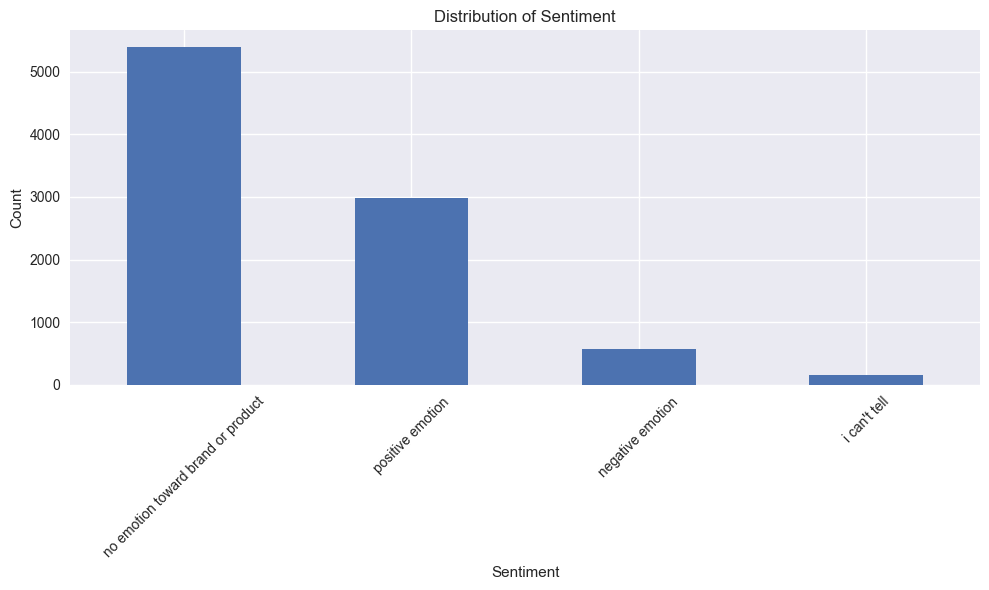

In [102]:
from wordcloud import WordCloud

# Set style for better-looking plots
plt.style.use('seaborn')

# 1. Distribution of sentiment
plt.figure(figsize=(10, 6))
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts().plot(kind='bar')
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

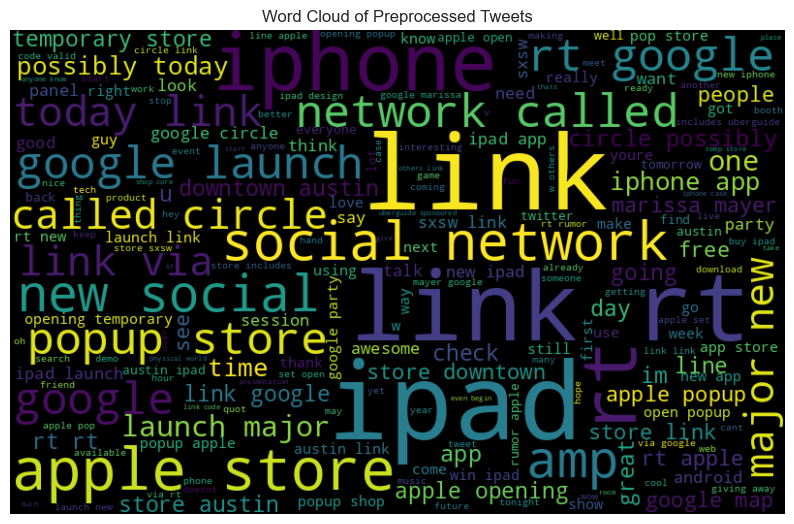

In [103]:
# Word cloud of preprocessed text
all_words = ' '.join(df['preprocessed_text'])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud of Preprocessed Tweets')
plt.show()

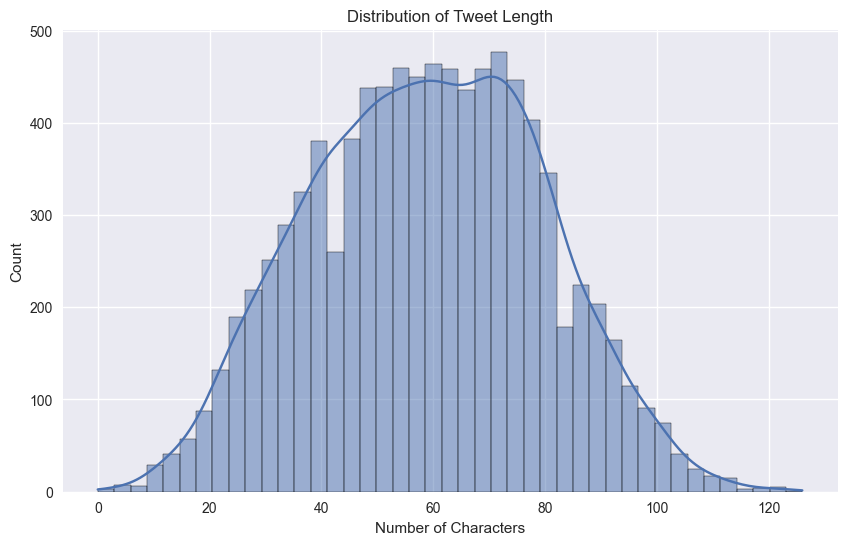

In [104]:
# 3. Distribution of tweet length
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], kde=True)
plt.title('Distribution of Tweet Length')
plt.xlabel('Number of Characters')
plt.ylabel('Count')
plt.show()


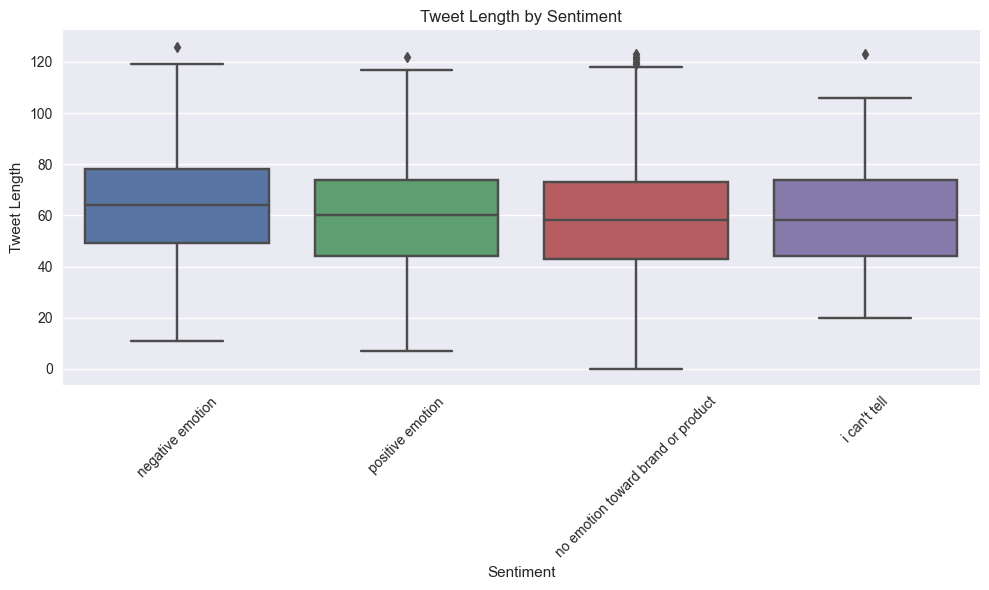

In [105]:
# 4. Box plot of tweet length by sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_there_an_emotion_directed_at_a_brand_or_product', y='text_length', data=df)
plt.title('Tweet Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Length')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

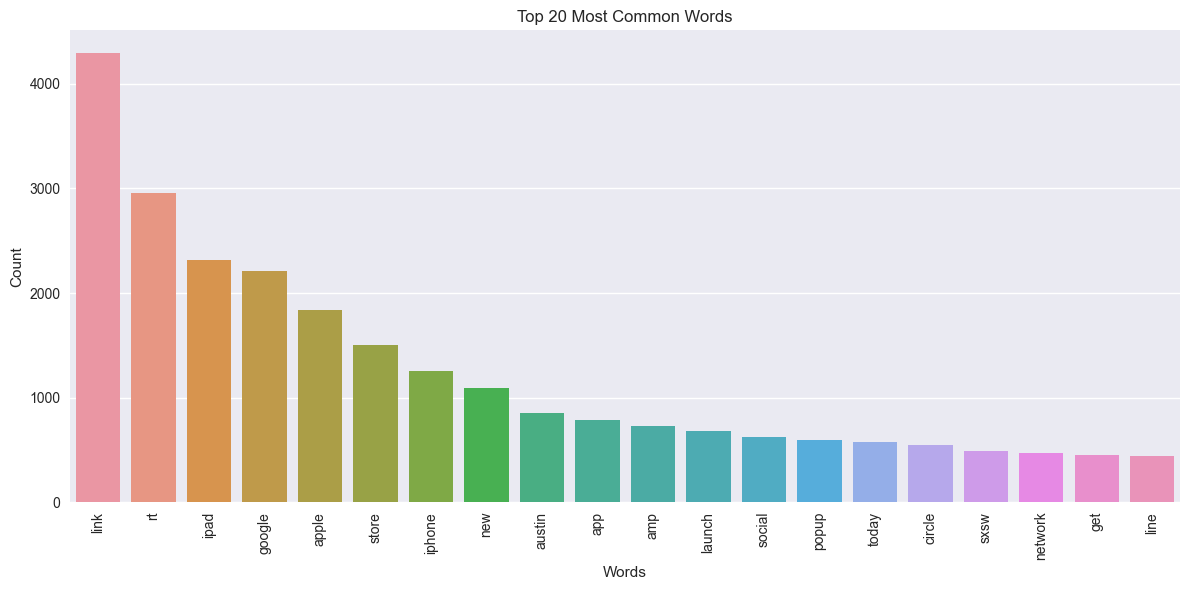

In [106]:
from collections import Counter

all_words = ' '.join(df['preprocessed_text']).split()
word_counts = Counter(all_words)
top_20 = dict(word_counts.most_common(20))

plt.figure(figsize=(12, 6))
sns.barplot(x=list(top_20.keys()), y=list(top_20.values()))
plt.title('Top 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [107]:
# Print some additional statistics
print("Total number of unique words:", len(set(all_words)))
print("\nTop 20 most common words:")
for word, count in top_20.items():
    print(f"{word}: {count}")

Total number of unique words: 8392

Top 20 most common words:
link: 4297
rt: 2959
ipad: 2311
google: 2207
apple: 1838
store: 1502
iphone: 1250
new: 1088
austin: 850
app: 789
amp: 724
launch: 681
social: 623
popup: 597
today: 573
circle: 543
sxsw: 490
network: 469
get: 454
line: 438


<Figure size 1200x600 with 0 Axes>

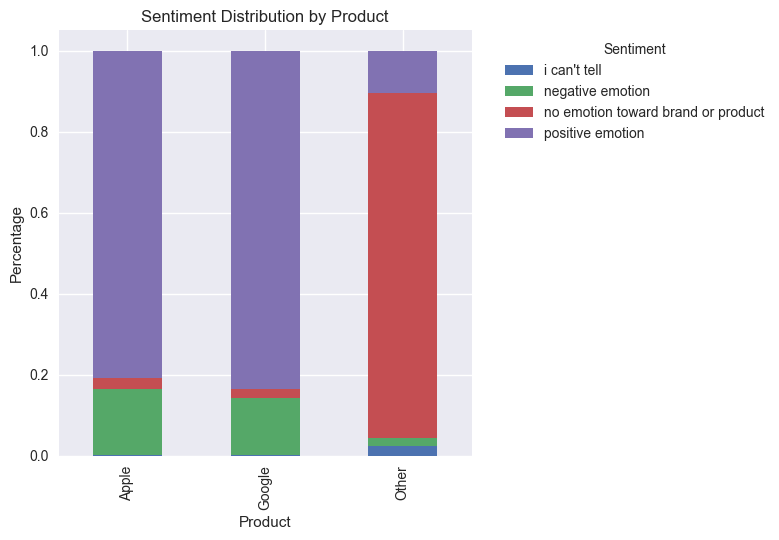

In [108]:
# Plot
plt.figure(figsize=(12, 6))
contingency_table_percent.plot(kind='bar', stacked=True)
plt.title('Sentiment Distribution by Product')
plt.xlabel('Product')
plt.ylabel('Percentage')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [109]:
# Print some statistics
print("Product distribution:")
print(df['Product'].value_counts())
print("\nContingency table (counts):")
print(contingency_table)
print("\nContingency table (percentages):")
print(contingency_table_percent)



Product distribution:
Product
Other     6231
Apple     2409
Google     452
Name: count, dtype: int64

Contingency table (counts):
is_there_an_emotion_directed_at_a_brand_or_product  i can't tell  \
Product                                                            
Apple                                                          7   
Google                                                         1   
Other                                                        148   

is_there_an_emotion_directed_at_a_brand_or_product  negative emotion  \
Product                                                                
Apple                                                            388   
Google                                                            63   
Other                                                            119   

is_there_an_emotion_directed_at_a_brand_or_product  no emotion toward brand or product  \
Product                                                                       

In [110]:
print("first few rows", df.head())
print("shape", df.shape)

first few rows                                           tweet_text  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2  @swonderlin Can not wait for #iPad 2 also. The...   
3  @sxsw I hope this year's festival isn't as cra...   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   

  emotion_in_tweet_is_directed_at  \
0                          iphone   
1              ipad or iphone app   
2                            ipad   
3              ipad or iphone app   
4                          google   

  is_there_an_emotion_directed_at_a_brand_or_product  \
0                                   negative emotion   
1                                   positive emotion   
2                                   positive emotion   
3                                   negative emotion   
4                                   positive emotion   

                                        cleaned_text  \
0  i have a g iphone after hrs t

## MODELING ##

In [111]:
print('Target unique values',df['is_there_an_emotion_directed_at_a_brand_or_product'].unique())

Target unique values ['negative emotion' 'positive emotion'
 'no emotion toward brand or product' "i can't tell"]


Before modeling we will further preprocess the target column to merge the  'no emotion toward brand or product' and  "i can't tell" values into neutral, then also rename the 'negative emotion' to just 'negative' and 'positive emotion' to just 'positive'.

**ENCODING**

In [112]:
# Function to prepare data for binary or multi-class classification
def prepare_data(df, binary=True):
    if binary:
        # Keep only positive and negative emotions
        df = df[df['is_there_an_emotion_directed_at_a_brand_or_product'].isin(['positive emotion', 'negative emotion'])]
    else:
        # Combine 'no emotion' and "can't tell" into 'neutral'
        df['is_there_an_emotion_directed_at_a_brand_or_product'] = df['is_there_an_emotion_directed_at_a_brand_or_product'].replace({
            'no emotion toward brand or product': 'neutral',
            "i can't tell": 'neutral'
        })
    
    # Encode the target variable
    le = LabelEncoder()
    df['sentiment_encoded'] = le.fit_transform(df['is_there_an_emotion_directed_at_a_brand_or_product'])
    
    # Prepare features and target
    X = df[['preprocessed_text', 'Product', 'text_length']]
    y = df['sentiment_encoded']
    
    return X, y, le

In [113]:
preprocessor = ColumnTransformer(
    transformers=[
        ('text_tfidf', TfidfVectorizer(max_features=5000), 'preprocessed_text'),
        ('product_onehot', OneHotEncoder(drop='first', sparse_output=False), ['Product'])
    ])

**PIPELINES**

In [114]:
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier

In [115]:
pipelines = {
    'Logistic Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('clf', LogisticRegression(random_state=42))
    ]),
    'Random Forest': Pipeline([
        ('preprocessor', preprocessor),
        ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
    ]),
    'SVM': Pipeline([
        ('preprocessor', preprocessor),
        ('clf', SVC(kernel='rbf', random_state=42))
    ]),
    'Gradient Boosting': Pipeline([
        ('preprocessor', preprocessor),
        ('clf', GradientBoostingClassifier(n_estimators=100, random_state=42))
    ]),
    'Neural Network': Pipeline([
        ('preprocessor', preprocessor),
        ('clf', MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42))
    ]),
    'XGBoost': Pipeline([
        ('preprocessor', preprocessor),
        ('clf', XGBClassifier(n_estimators=100, random_state=42))
    ])
    # 'LightGBM': Pipeline([
    #     ('preprocessor', preprocessor),
    #     ('clf', LGBMClassifier(n_estimators=100, random_state=42))
    # ])
}

**TRAINING**

In [116]:
# Function to train and evaluate models
def train_and_evaluate(X, y, pipelines):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    results = {}

    for name, pipeline in pipelines.items():
        print(f"\nTraining {name}...")
        pipeline.fit(X_train, y_train)
        
        y_pred = pipeline.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)
        cm = confusion_matrix(y_test, y_pred)
        
        results[name] = {
            'accuracy': accuracy,
            'report': report,
            'confusion_matrix': cm
        }
        
        print(f"{name} Accuracy: {accuracy:.4f}")

    return results, X_test

BINARY CLASSIFICATION

In [117]:
# Train and evaluate binary classification models
print("Binary Classification (Positive vs Negative)")
X, y, le = prepare_data(df, binary=True)
binary_results, X_test_binary = train_and_evaluate(X, y, pipelines)

Binary Classification (Positive vs Negative)

Training Logistic Regression...
Logistic Regression Accuracy: 0.8437

Training Random Forest...
Random Forest Accuracy: 0.8761

Training SVM...
SVM Accuracy: 0.8592

Training Gradient Boosting...
Gradient Boosting Accuracy: 0.8521

Training Neural Network...
Neural Network Accuracy: 0.8634

Training XGBoost...
XGBoost Accuracy: 0.8493


MULTI-CLASSIFIER

In [118]:
# Train and evaluate multi-class classification models
print("\nMulti-class Classification (Positive vs Negative vs Neutral)")
X, y, le = prepare_data(df, binary=False)
multi_results, X_test_multi = train_and_evaluate(X, y, pipelines)


Multi-class Classification (Positive vs Negative vs Neutral)

Training Logistic Regression...
Logistic Regression Accuracy: 0.8714

Training Random Forest...
Random Forest Accuracy: 0.8593

Training SVM...
SVM Accuracy: 0.8708

Training Gradient Boosting...
Gradient Boosting Accuracy: 0.8681

Training Neural Network...
Neural Network Accuracy: 0.8125

Training XGBoost...
XGBoost Accuracy: 0.8659


MODEL COMPARISON

In [119]:
# Function to compare model performances
def compare_performances(results):
    for name, result in results.items():
        print(f"\n{name}:")
        print(f"Accuracy: {result['accuracy']:.4f}")
        print("F1-scores:")
        for class_name, metrics in result['report'].items():
            if isinstance(metrics, dict):
                print(f"  {class_name}: {metrics['f1-score']:.4f}")

# Compare performances
print("\nBinary Classification Results:")
compare_performances(binary_results)

print("\nMulti-class Classification Results:")
compare_performances(multi_results)


Binary Classification Results:

Logistic Regression:
Accuracy: 0.8437
F1-scores:
  negative emotion: 0.1120
  positive emotion: 0.9143
  macro avg: 0.5131
  weighted avg: 0.7843

Random Forest:
Accuracy: 0.8761
F1-scores:
  negative emotion: 0.4054
  positive emotion: 0.9308
  macro avg: 0.6681
  weighted avg: 0.8457

SVM:
Accuracy: 0.8592
F1-scores:
  negative emotion: 0.2537
  positive emotion: 0.9222
  macro avg: 0.5880
  weighted avg: 0.8140

Gradient Boosting:
Accuracy: 0.8521
F1-scores:
  negative emotion: 0.2105
  positive emotion: 0.9184
  macro avg: 0.5645
  weighted avg: 0.8038

Neural Network:
Accuracy: 0.8634
F1-scores:
  negative emotion: 0.5446
  positive emotion: 0.9196
  macro avg: 0.7321
  weighted avg: 0.8589

XGBoost:
Accuracy: 0.8493
F1-scores:
  negative emotion: 0.3593
  positive emotion: 0.9146
  macro avg: 0.6369
  weighted avg: 0.8247

Multi-class Classification Results:

Logistic Regression:
Accuracy: 0.8714
F1-scores:
  negative emotion: 0.2553
  neutral: 0.

**KEY OBSERVATIONS**

Class Imbalance: There seems to be a significant class imbalance in your dataset. Neutral emotions are likely the most common, followed by positive, with negative emotions being rare.

Difficulty with Negative Emotions: All models struggle to identify negative emotions accurately, especially in the binary classification task. This could be due to the class imbalance or the complexity of identifying negative sentiments.

Model Performance: In binary classification, Random Forest and Neural Network perform best overall. In multi-class classification, Logistic Regression, SVM, and XGBoost perform similarly well.

Multi-class vs Binary: The models seem to perform slightly better in the multi-class scenario, possibly because the addition of the neutral class helps to separate positive and negative emotions more effectively.

In [120]:
def test_model(model, X_test, le):
    # Select a random sample from X_test
    sample = X_test.sample(n=1, random_state=42)
    
    # Make prediction
    prediction = model.predict(sample)
    predicted_sentiment = le.inverse_transform(prediction)[0]
    
    print("\nSample Test:")
    print(f"Text: {sample['preprocessed_text'].values[0]}")
    print(f"Product: {sample['Product'].values[0]}")
    print(f"Predicted sentiment: {predicted_sentiment}")

# Test the best performing model (you can change this based on the results)
best_model = pipelines['Logistic Regression']  # Change this to the best performing model
test_model(best_model, X_test_multi, le)


Sample Test:
Text: found bbq sauce ipad tech texas really come together
Product: Apple
Predicted sentiment: positive emotion


**FEATURE IMPORTANCE**

In [124]:
for name in ['Logistic Regression', 'Random Forest']:
    if name == 'Logistic Regression':
        feature_importance = pipelines[name].named_steps['clf'].coef_[0]
    else:
        feature_importance = pipelines[name].named_steps['clf'].feature_importances_
    
    feature_names = (pipelines[name].named_steps['preprocessor']
                     .named_transformers_['text_tfidf']
                     .get_feature_names_out())
    
    # Add other feature names
    feature_names = np.concatenate([
        feature_names,
        pipelines[name].named_steps['preprocessor'].named_transformers_['product_onehot'].get_feature_names_out(['Product']),
        ['text_length']
    ])
    
    # Get top 20 features
    top_features = sorted(zip(feature_importance, feature_names), key=lambda x: abs(x[0]), reverse=True)[:20]
    
    print(f"\nTop 20 features for {name}:")
    for importance, feature in top_features:
        print(f"{feature}: {importance:.4f}")


Top 20 features for Logistic Regression:
link: -2.6587
Product_Other: -1.8211
long: 1.7322
headache: 1.5890
suck: 1.3475
better: 1.3423
button: 1.2665
another: 1.2588
hate: 1.2038
free: -1.1972
rt: -1.1825
people: 1.1656
tag: 1.1608
new: -1.1406
design: 1.1197
amp: -1.1131
fail: 1.0971
fascist: 1.0706
instead: 1.0578
store: -1.0561

Top 20 features for Random Forest:
Product_Other: 0.2876
Product_Google: 0.0294
link: 0.0153
ipad: 0.0124
google: 0.0103
rt: 0.0084
apple: 0.0064
app: 0.0060
iphone: 0.0056
store: 0.0053
great: 0.0050
cool: 0.0044
new: 0.0038
awesome: 0.0037
time: 0.0032
amp: 0.0031
social: 0.0030
austin: 0.0030
get: 0.0030
popup: 0.0029


Handling Class Imbalances

In [122]:
#pip install imbalanced-learn


In [125]:
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.pipeline import Pipeline as ImbPipeline